In [1]:
import numpy as np
import tables as tb
import matplotlib.pyplot as plt
import uncertainties
import uncertainties.unumpy

In [10]:
omc_res = tb.File('openmc/saltproc_runtime/saltproc_results.h5')
spn_res = tb.File('serpent/saltproc_runtime/saltproc_results.h5')

## $k_\text{eff}$

In [11]:
time = omc_res.root.simulation_parameters.col('cumulative_time_at_eds').tolist()
k_omc_0 = omc_res.root.simulation_parameters.col('keff_bds')
k_omc_1 = omc_res.root.simulation_parameters.col('keff_eds')
k_spn_0 = spn_res.root.simulation_parameters.col('keff_bds')
k_spn_1 = spn_res.root.simulation_parameters.col('keff_eds')

k_omc = (k_omc_0, k_omc_1)
k_spn = (k_spn_0, k_spn_1)

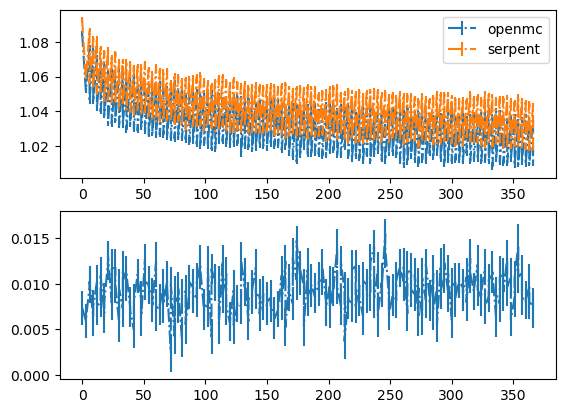

In [12]:
fig, axes = plt.subplots(nrows=2)
for o in [(k_omc, 'openmc'), (k_spn, 'serpent')]:
    k, name = o
    k0, k1 = k
    if name == 'serpent':
        ks_omc = uncertainties.unumpy.uarray(ks[:,0], ks[:,1])
    ks = []
    ts = []
    for i in range(len(k0)):
        ks.append(k0[i].tolist())
        ks.append(k1[i].tolist())
        ts.append(time[i])
        ts.append(time[i])
    ts[0] = 0
    ks = np.array(ks)
    axes[0].errorbar(ts, ks[:,0], yerr=ks[:,1], label=f'{name}', fmt='-.')
    axes[0].legend()
    if name == 'serpent':
        ks = uncertainties.unumpy.uarray(ks[:,0], ks[:,1])
        kerr = (ks - ks_omc) / ks
        k_err = []
        k_err_err = []
        for k in kerr:
            k_err.append(k.n)
            k_err_err.append(k.s)
        axes[1].errorbar(ts, k_err, yerr=k_err_err, fmt='-.')
    

## Burnup

In [13]:
omc_res.root.materials.fuel.before_reproc.parameters.col('density')

array([3.35      , 3.34999108, 3.34998215, 3.34997321, 3.34996425,
       3.34995529, 3.34994632, 3.34993734, 3.34992835, 3.34991937,
       3.34991037, 3.34990137, 3.34989237, 3.34988337, 3.34987436,
       3.34986536, 3.34985635, 3.34984734, 3.34983833, 3.34982932,
       3.3498203 , 3.34981129, 3.34980227, 3.34979326, 3.34978424,
       3.34977522, 3.3497662 , 3.34975719, 3.34974817, 3.34973915,
       3.34973013, 3.34972111, 3.34971209, 3.34970307, 3.34969405,
       3.34968503, 3.34967601, 3.34966699, 3.34965797, 3.34964895,
       3.34963993, 3.34963091, 3.34962188, 3.34961286, 3.34960384,
       3.34959482, 3.3495858 , 3.34957677, 3.34956775, 3.34955873,
       3.34954971, 3.34954068, 3.34953166, 3.34952263, 3.34951361,
       3.34950459, 3.34949557, 3.34948654, 3.34947752, 3.3494685 ,
       3.34945947, 3.34945045, 3.34944142, 3.3494324 , 3.34942338,
       3.34941435, 3.34940533, 3.3493963 , 3.34938728, 3.34937826,
       3.34936923, 3.34936021, 3.34935118, 3.34934216, 3.34933

In [14]:
spn_res.root.materials.fuel.before_reproc.parameters.col('density')

array([3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35,
       3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35,
       3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35,
       3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35,
       3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35,
       3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35,
       3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35,
       3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35,
       3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35,
       3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35,
       3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35, 3.35,
       3.35, 3.35])

In [15]:
omc_res.root.materials.fuel.before_reproc.comp.attrs.iso_map

OrderedDict([('H1', 0),
             ('H2', 1),
             ('H3', 2),
             ('He3', 3),
             ('He4', 4),
             ('Li6', 5),
             ('Li7', 6),
             ('Be9', 7),
             ('B10', 8),
             ('B11', 9),
             ('N14', 10),
             ('N15', 11),
             ('O16', 12),
             ('O17', 13),
             ('F19', 14),
             ('Na22', 15),
             ('Na23', 16),
             ('Mg24', 17),
             ('Mg25', 18),
             ('Mg26', 19),
             ('Al27', 20),
             ('Si28', 21),
             ('Si29', 22),
             ('Si30', 23),
             ('P31', 24),
             ('S32', 25),
             ('S33', 26),
             ('S34', 27),
             ('S36', 28),
             ('Cl35', 29),
             ('Cl37', 30),
             ('Ar36', 31),
             ('Ar38', 32),
             ('Ar40', 33),
             ('K39', 34),
             ('K40', 35),
             ('K41', 36),
             ('Ca40', 37),
          

## Nuclide composition

In [60]:
omc_res.root.materials.fuel.after_reproc.comp

/materials/fuel/after_reproc/comp (EArray(1, 421)fletcher32, shuffle, blosc(9)) 'Isotopic composition for fuel'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'python'
  byteorder := 'little'
  chunkshape := (19, 421)

In [16]:
spn_before_reproc = spn_res.root.materials.fuel.before_reproc
spn_after_reproc = spn_res.root.materials.fuel.after_reproc
omc_before_reproc = omc_res.root.materials.fuel.before_reproc
omc_after_reproc = omc_res.root.materials.fuel.after_reproc

spn_map = spn_res.root.materials.fuel.before_reproc.comp.attrs.iso_map
omc_map = omc_res.root.materials.fuel.before_reproc.comp.attrs.iso_map

spn_comp_0 = []
spn_comp_1 = []
omc_comp_0 = []
omc_comp_1 = []
for i in range(len(spn_after_reproc.comp)):
    spn_comp_0.append(spn_before_reproc.comp[i])
    spn_comp_1.append(spn_after_reproc.comp[i])
    omc_comp_0.append(omc_before_reproc.comp[i])
    omc_comp_1.append(omc_after_reproc.comp[i])

comp_spn_0 = np.array(spn_comp_0)
comp_spn_1 = np.array(spn_comp_1)
comp_omc_0 = np.array(omc_comp_0)
comp_omc_1 = np.array(omc_comp_1)

IndexError: Index out of range

In [18]:
nuc = 'Ag109'
(comp_spn_0[:,spn_map[nuc]] - comp_omc_0[:,omc_map[nuc]]) / comp_spn_0[:,spn_map[nuc]]

NameError: name 'comp_spn_0' is not defined

In [267]:
comp_omc_1[:,omc_map['Cs137']]

array([ 275.93561163,  549.37647702,  820.33927404, 1088.84334468,
       1354.90348097, 1618.53975748, 1879.76929349, 2138.61469167,
       2395.09410297, 2649.22600632, 2901.03176186, 3150.53196294])

In [268]:
comp_spn_1[:,spn_map['Cs137']]

array([2.76020453e+02, 5.49534013e+02, 2.11320385e-03, 2.11299107e-03,
       2.11351403e-03, 2.11390960e-03, 2.11395094e-03, 2.11451900e-03,
       2.11445211e-03, 2.11466221e-03, 2.11500746e-03, 2.11514618e-03])

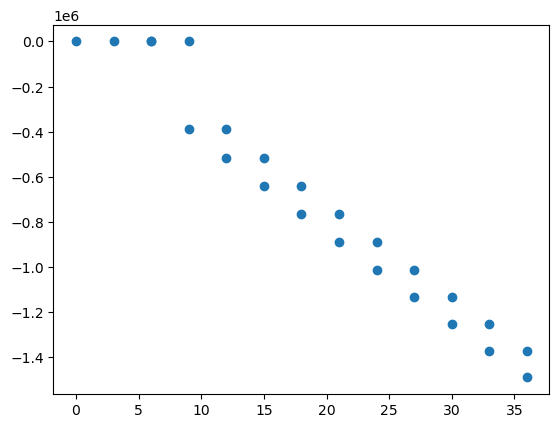

In [260]:
nuc = 'Cs137'
comp_omc = (comp_omc_0, comp_omc_1)
comp_spn = (comp_spn_0, comp_spn_1)

fig, ax = plt.subplots()
for o in [(comp_omc, omc_map, 'openmc'), (comp_spn, spn_map, 'serpent')]:
    comp, nucmap, name = o
    comp0, comp1 = comp
    comp0 = comp0[:, nucmap[nuc]]
    comp1 = comp1[:, nucmap[nuc]]
    if name == 'serpent':
        comps_omc = comps
    comps = []
    ts = []
    for i in range(len(comp0)):
        comps.append(comp0[i].tolist())
        comps.append(comp1[i].tolist())
        ts.append(time[i])
        ts.append(time[i])
    ts[0] = 0
    comps = np.array(comps)
    if name == 'serpent':
        comperr = (comps - comps_omc) / comps
        ax.scatter(ts, comperr)

In [217]:
comp0

array([[1.0925516 , 0.00171261],
       [1.0906188 , 0.00202009],
       [1.0851246 , 0.00157816],
       [1.0880762 , 0.00180415],
       [1.0801871 , 0.0014596 ],
       [1.0791891 , 0.00143863],
       [1.0729754 , 0.00176919],
       [1.0770785 , 0.00214946],
       [1.0751679 , 0.00161157],
       [1.0694802 , 0.00145695],
       [1.0705508 , 0.00145147],
       [1.0737001 , 0.00160063]], dtype=float32)

In [209]:
spn_comp_after_reproc[:,spn_map['U238']]

array([4.31502905e-11, 7.61026042e-10, 2.14144087e-06, 6.46640694e-06,
       1.49800751e-05, 3.00109023e-05, 5.31665275e-05, 8.77428022e-05,
       1.35948221e-04, 1.97155040e-04, 2.78144019e-04, 3.81178172e-04])

In [206]:
spn_comp_0

array([[8.15176512e-14, 1.62910118e-13, 2.43952846e-13, ...,
        0.00000000e+00, 2.06329240e-11, 0.00000000e+00],
       [1.54113573e-02, 1.24158871e-03, 9.96065948e-04, ...,
        5.07353633e-13, 2.02120690e-12, 6.04763893e-15],
       [3.12870375e-02, 2.49040750e-03, 3.37874208e-03, ...,
        1.47820818e-13, 4.94007393e-13, 5.59868226e-15],
       ...,
       [1.43363348e-01, 1.13912292e-02, 6.00156230e-02, ...,
        8.57052906e-15, 2.43778093e-13, 3.83121402e-15],
       [1.59327763e-01, 1.26293071e-02, 7.37719098e-02, ...,
        8.11544101e-15, 2.30504887e-13, 3.62716720e-15],
       [1.75407257e-01, 1.39452435e-02, 8.89810492e-02, ...,
        7.63588189e-15, 2.17966186e-13, 3.42846528e-15]])

In [211]:
time

[3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0]

In [102]:
branches = np.array([['Na23',110230,102,0.23200,0.76800],
['Cl37',170370,102,0.88090,0.11910],
['Sc45',210450,102,0.55600,0.44400],
['Co59',270590,102,0.44400,0.55600],
['Ge72',320720,102,0.50120,0.49880],
['Ge74',320740,102,0.66600,0.33400],
['Ge76',320760,102,0.40050,0.59950],
['Se76',340760,102,0.74090,0.25910],
['Se78',340780,102,0.11780,0.88220],
['Se80',340800,102,0.84540,0.15460],
['Se82',340820,102,0.14020,0.85980],
['Br79',350790,102,0.76870,0.23130],
['Br81',350810,102,0.09140,0.90860],
['Kr78',360780,102,0.97040,0.02960],
['Kr80',360800,102,0.60310,0.39690],
['Kr82',360820,102,0.33300,0.66700],
['Kr84',360840,102,0.18390,0.81610],
['Rb85',370850,102,0.87910,0.12090],
['Sr84',380840,102,0.25300,0.74700],
['Sr86',380860,102,0.19880,0.80120],
['Y89',390890,102,0.99790,0.00210],
['Y90',390900,102,0.74960,0.25040],
['Nb93',410930,102,0.31010,0.68990],
['Nb94',410940,102,0.96100,0.03900],
['Mo92',420920,102,0.99780,0.00220],
['Rh103',451030,102,0.92400,0.07600],
['Rh105',451050,102,0.90400,0.09600],
['Pd106',461060,102,0.95270,0.04730],
['Pd108',461080,102,0.97790,0.02210],
['Pd110',461100,102,0.85000,0.15000],
['Ag107',471070,102,0.98980,0.01020],
['Ag109',471090,102,0.95400,0.04600],
['Cd110',481100,102,0.99450,0.00550],
['Cd112',481120,102,0.86850,0.13150],
['Cd114',481140,102,0.88120,0.11880],
['Cd116',481160,102,0.66600,0.33400],
['In113',491130,102,0.41910,0.58090],
['Sn112',501120,102,0.72530,0.27470],
['Sn116',501160,102,0.95680,0.04320],
['Sn118',501180,102,0.97940,0.02060],
['Sn120',501200,102,0.98750,0.01250],
['Sn122',501220,102,0.01120,0.98880],
['Sn124',501240,102,0.03750,0.96250],
['Sn126',501260,102,0.30180,0.69820],
['Sb121',511210,102,0.93690,0.06310],
['Te120',521200,102,0.88710,0.11290],
['Te122',521220,102,0.64480,0.35520],
['Te124',521240,102,0.99120,0.00880],
['Te126',521260,102,0.86890,0.13110],
['Te128',521280,102,0.92450,0.07550],
['Te130',521300,102,0.85590,0.14410],
['Te132',521320,102,0.85170,0.14830],
['I129',531290,102,0.41300,0.58700],
['I131',531310,102,0.98390,0.01610],
['Xe124',541240,102,0.83000,0.17000],
['Xe126',541260,102,0.86910,0.13090],
['Xe128',541280,102,0.89230,0.10770],
['Xe130',541300,102,0.91640,0.08360],
['Xe132',541320,102,0.88670,0.11330],
['Xe133',541330,102,0.96000,0.04000],
['Xe134',541340,102,0.98530,0.01470],
['Cs133',551330,102,0.90700,0.09300],
['Cs134',551340,102,0.99600,0.00400],
['Cs135',551350,102,0.98400,0.01600],
['Cs137',551370,102,0.90210,0.09790],
['Ba130',561300,102,0.88710,0.11290],
['Ba132',561320,102,0.91750,0.08250],
['Ba134',561340,102,0.92630,0.07370],
['Ba135',561350,102,0.99780,0.00220],
['Ba136',561360,102,0.97310,0.02690],
['Ce136',581360,102,0.86620,0.13380],
['Ce138',581380,102,0.97870,0.02130],
['Pr141',591410,102,0.65190,0.34810],
['Pr143',591430,102,0.31000,0.69000],
['Pm147',611470,102,0.53300,0.46700],
['Eu153',631530,102,0.98400,0.01600],
['Dy164',661640,102,0.37000,0.63000],
['Ho165',671650,102,0.94900,0.05100],
['Er166',681660,102,0.25030,0.74970],
['Lu175',711750,102,0.33310,0.66690],
['Lu176',711760,102,0.99900,0.00100],
['Hf179',721790,102,0.99100,0.00900],
['W182',741820,102,0.86990,0.13010],
['W184',741840,102,0.99830,0.00170],
['Re185',751850,102,0.99900,0.00100],
['Re187',751870,102,0.97290,0.02710],
['Au197',791970,102,0.99900,0.00100],
['Hg196',801960,102,0.96600,0.03400],
['Hg198',801980,102,0.99180,0.00820],
['Pb206',822060,102,0.97830,0.02170],
['Bi209',832090,102,0.67910,0.32090],
['Pa233',912330,102,0.48710,0.51290],
['U234',922340,102,0.50000,0.50000],
['Np235',932350,102,0.40000,0.60000],
['Np239',932390,102,0.35730,0.64270],
['Pu236',942360,102,0.50010,0.49990],
['Am241',952410,102,0.91900,0.08100],
['Am243',952430,102,0.06260,0.93740],
['Bk247',972470,102,0.40000,0.60000],
['Es253',992530,102,0.03200,0.96800],
['Es255',992550,102,0.98400,0.01600]], dtype=object)

In [107]:
branches = branches[:,[0,3,4]]

In [108]:
import pandas as pd

In [110]:
pd.DataFrame(branches).to_csv('serpent_branching_ratios.csv',header=False,index=False)

In [99]:
np.savetxt('serpent_branching_ratios.csv',branches)

TypeError: Mismatch between array dtype ('<U32') and format specifier ('%.18e %.18e %.18e')